In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
Add_sales_data=pd.read_csv(r"C:\Users\HP\Downloads\Add_sales_data_2018.csv")

In [3]:
Add_sales_data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
Add_sales_data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

There is not any null values in the given dataset

In [5]:
Add_sales_data.shape

(205, 7)

There are 205 rows and 7 columns

# 1.First of all, check whether there is any relationship between the amount               spent  for advertising through five different companies and profit generated 

<AxesSubplot:>

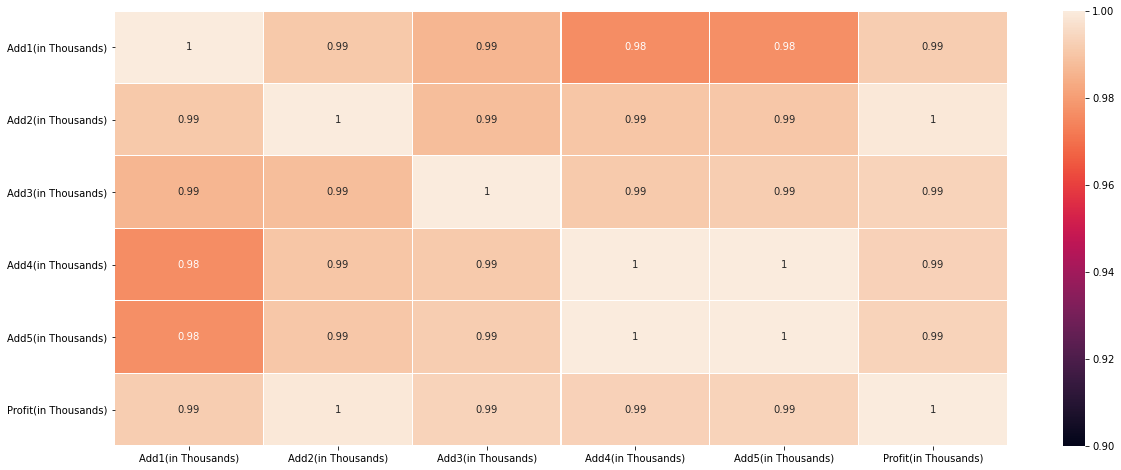

In [6]:
corrmatrix=Add_sales_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.9,vmax=1,annot=True,linewidth=0.2)

From the above heatmap,we understand that all the variables are having highly positive correlation.Espically variables such as profit&Add2 and Add4&Add5 are having strong positive correlation. 

# 2. Build a regression model to predict the profit from the given data and comment your findings on it

In [7]:
# Define x and y
y=Add_sales_data['Profit(in Thousands)']
x=Add_sales_data.drop(['Profit(in Thousands)','Date'],axis=1)

In [8]:
# split the dataset in training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)

In [9]:
from sklearn import linear_model

In [10]:
lr=linear_model.LinearRegression()

In [11]:
# train the model on the training set
model=lr.fit(x_train,y_train)

In [17]:
# predict the test set results
y_pred=model.predict(x_test)

In [18]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64


In [20]:
print(y_pred)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788]


From the above,we understand that the predicted and observed y test values are same.This means that predictions have highly accurate.so there is no errors in this case

In [21]:
# evaluate the model
from sklearn.metrics import r2_score
r_sq=r2_score(y_pred,y_test)

In [22]:
r_sq

1.0

from the above R-squared value,we understand that the model explains all the variability of the response data around its mean.In other words,the higher the R-squared,the better the model fits our data. 

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement

Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320

In [23]:
model.predict([[290,312,309,298,320]])

array([5820.06])

If the company wish to spend the amount of Rs 290,312,309,298 and 320 for 5 different advertising companies,the profit will be 5820